# Barvení grafu

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from IPython.display import display, clear_output


### Dimacs format

In [5]:
Gd = nx.Graph()

def readdimacs(filename):

    file = open(filename, 'r')
    lines = file.readlines()
    
    Gd = nx.Graph()

    for line in lines:
        if line[0] == "e":
            vs = [int(s) for s in line.split() if s.isdigit()]
            Gd.add_edge(vs[0]-1, vs[1]-1)
    return Gd

# http://cedric.cnam.fr/~porumbed/graphs/
G1 = readdimacs('graphs/dsjc125.1.col')  
G2 = readdimacs('graphs/r125.1.col')
G3 = readdimacs('graphs/r125.5.col')
G4 = readdimacs('graphs/dsjc125.9.col')




In [6]:
def random_walk_graph_colors(G, colors, steps):
    # list of random colors to be used
    colmap = ["#"+f"{hex(random.randint(0, 2**24 - 1))}"[2:].zfill(6) for i in range(colors)]
    # randomly appointing colors to nodes
    colnum = [random.randint(0, len(colmap) - 1) for i in range(max(G.nodes) + 1)]
    s = 0
    while s < steps:
        random_index = random.randint(0, len(colnum) - 1)
        random_color = random.choice([i for i in range(0, colors) if i != colnum[random_index]])
        colnum[random_index] = random_color
        if not check_collisions(G, colnum):
            print(f"Stop - solution with {colors} colors found after {s} steps")
            break
        s += 1
    else:
        print("No solution found")
    colors = [colmap[c] for c in colnum]
    colors = [colors[i] for i in G.nodes()]
    nx.draw(G, node_color=colors, with_labels=True)


In [7]:
def shuffle_collisions(graph, colmap, colnum):
    neighbours = list(graph.edges())
    for adj in neighbours:
        if colnum[adj[0]] == colnum[adj[1]] and random.random() < 0.5:
            colnum[adj[random.randint(0, 1)]] = random.randint(0, len(colmap) - 1)  


In [8]:
def find_best_change(G, colmap, colnum):
    # (number of collisions saved, node nr., new color)
    best_change = (0, None, None)
    for node in G.nodes:
        node_color = colnum[node]
        # number of neighbors of the ith color - starting with all 0s
        arr_neighbors_colors = [0 for i in range(len(colmap))]
        for neighbor in G.neighbors(node):
            arr_neighbors_colors[colnum[neighbor]] += 1
        # maximal number of collisions to be saved = current nr. of collisions - the lowest number of collisions from the remaining colors
        max_save = arr_neighbors_colors[node_color] - min(arr_neighbors_colors)
        # if it is the best so far, save it
        if max_save > best_change[0]:
            best_change = (max_save, node, arr_neighbors_colors.index(min(arr_neighbors_colors)))
    return best_change

In [9]:
def hill_climb_graph_colors(G, colors, steps):
    # list of random colors to be used
    colmap = ["#"+f"{hex(random.randint(0, 2**24 - 1))}"[2:].zfill(6) for i in range(colors)]
    # randomly appointing colors to nodes
    colnum = [random.randint(0, len(colmap) - 1) for i in range(max(G.nodes) + 1)]
    s = 0
    while s < steps:
        cols = check_collisions(G, colnum)
        if not cols:
            print(f"Stop - solution with {colors} colors found after {s} steps")
            break
        best_change = find_best_change(G, colmap, colnum)
        if best_change[0] == 0:
            shuffle_collisions(G, colmap, colnum)
        else:
            colnum[best_change[1]] = best_change[2]
        s += 1
    else:
        print(f"No solution found - {cols} collisions")

    
    colors = [colmap[c] for c in colnum]
    colors = [colors[i] for i in G.nodes()]
    return cols


In [10]:
# False, if no collisions occure
def check_collisions(G, colnum):
    sum_collisions = 0
    neighbours = list(G.edges())
    for adj in neighbours:
        if colnum[adj[0]] == colnum[adj[1]]:
            sum_collisions += 1  
    return sum_collisions
    

In [11]:
G = nx.Graph()
G.add_edges_from([(0, 2), (2, 3), (3, 4), (2, 4), (3, 1), (4,5), (5,0)])  # ze seznamu dvojic


In [12]:
arr = []
for i in range(10):
    arr.append(hill_climb_graph_colors(G4, 44,  6000))
    print(i)
    clear_output(wait=True)  # Clear the cell's output



Stop - solution with 44 colors found after 3176 steps
9


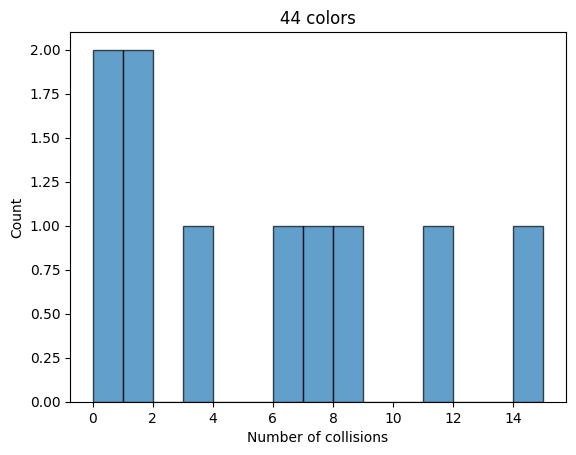

In [13]:
abs_counts = [abs(num) for num in arr]
# Create a histogram
plt.hist(abs_counts, bins=range(min(abs_counts), max(abs_counts) + 2), edgecolor='black', alpha=0.7)

# Customize the plot
plt.xlabel('Number of collisions')
plt.ylabel('Count')
plt.title('44 colors')

plt.savefig('graphs_plots/45_colors.jpg', format='jpeg')

# Display the plot
plt.show()
